In [3]:
import torch
from torch import nn

In [4]:
alexnet = nn.Sequential(
        nn.Conv2d(1,96, kernel_size=11, stride=4), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2),
        nn.Conv2d(96, 256,kernel_size=5, padding=2),nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2),
        nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
        nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
        nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2),
        nn.Flatten(),
        nn.Linear(6400,4096), nn.Dropout(p=0.5),
        nn.Linear(4096, 256), nn.Dropout(p=0.5),
        nn.Linear(256,10)
    )

In [5]:
def look_in_net(net, X):
    out = X
    
    for layer in net:
        out = layer(out)
        print(f" for layer {layer.__class__.__name__} shape : {out.shape}")

In [6]:
X = torch.randn(10,1,224,224)

look_in_net(alexnet, X)

 for layer Conv2d shape : torch.Size([10, 96, 54, 54])
 for layer ReLU shape : torch.Size([10, 96, 54, 54])
 for layer MaxPool2d shape : torch.Size([10, 96, 26, 26])
 for layer Conv2d shape : torch.Size([10, 256, 26, 26])
 for layer ReLU shape : torch.Size([10, 256, 26, 26])
 for layer MaxPool2d shape : torch.Size([10, 256, 12, 12])
 for layer Conv2d shape : torch.Size([10, 384, 12, 12])
 for layer ReLU shape : torch.Size([10, 384, 12, 12])
 for layer Conv2d shape : torch.Size([10, 384, 12, 12])
 for layer ReLU shape : torch.Size([10, 384, 12, 12])
 for layer Conv2d shape : torch.Size([10, 256, 12, 12])
 for layer ReLU shape : torch.Size([10, 256, 12, 12])
 for layer MaxPool2d shape : torch.Size([10, 256, 5, 5])
 for layer Flatten shape : torch.Size([10, 6400])
 for layer Linear shape : torch.Size([10, 4096])
 for layer Dropout shape : torch.Size([10, 4096])
 for layer Linear shape : torch.Size([10, 256])
 for layer Dropout shape : torch.Size([10, 256])
 for layer Linear shape : torch.

z:\installs\anconda\envs\myenv\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [7]:
batch_size = 64

import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.datasets as datasets

my_transforms = transforms.Compose(
                [
                 transforms.Resize(224),
                 transforms.ToTensor()
                ]
)

train_dataset = datasets.FashionMNIST(download=False, root="../../data", train=True, transform=my_transforms)
test_dataset = datasets.FashionMNIST(download=False, root="../../data", train=False, transform=my_transforms)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

tensor([1, 1, 8, 7, 4, 8, 7, 4, 3, 9, 6, 9, 7, 4, 6, 0, 8, 7, 3, 4, 1, 5, 7, 1,
        0, 9, 1, 6, 6, 4, 3, 7, 7, 2, 8, 6, 2, 1, 1, 9, 9, 6, 9, 5, 9, 9, 9, 4,
        6, 8, 5, 4, 4, 7, 4, 0, 7, 7, 8, 4, 7, 2, 6, 0])


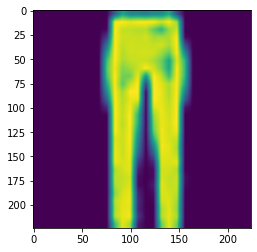

In [8]:
# we can define a smaller alexnet if we want

for X, y in train_dataloader:
    break
    
import matplotlib.pyplot as plt

plt.imshow(X[0].permute(1,2,0))
print(y)


In [9]:
net = alexnet
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
num_epochs = 3

In [10]:
def accuracy(y_hat, y):
    return (torch.argmax(y_hat, dim=1)==y).sum().float().mean()

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [12]:
net = net.to(device)

In [13]:
%%time
acc_arr = []


for epoch in range(num_epochs):
    acc_val = 0
    number = 0
    for X, y in train_dataloader:
        X = X.to(device)
        y = y.to(device)
        pred = net(X)
        l = criterion(pred, y)
        
        acc_val += accuracy(pred,y)
        number += len(y)
        
        optimizer.zero_grad()
        
        l.backward()
        
        optimizer.step()
    
        
    acc_arr.append(acc_val.detach().cpu()/number)
    print(f"Epoch {epoch} accuracy : {acc_arr[-1]}")

Epoch 0 accuracy : 0.7222499847412109
Epoch 1 accuracy : 0.866433322429657
Epoch 2 accuracy : 0.8896833062171936
Wall time: 6min 21s


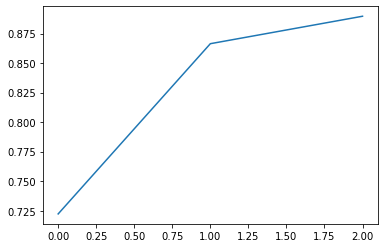

In [14]:
plt.plot(range(num_epochs), acc_arr)
plt.show()

In [15]:
acc_arr[-1]

tensor(0.8897)

In [16]:
#%conda install torchsummary

In [19]:
from torchsummary import summary
summary(net, (1,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 54, 54]          11,712
              ReLU-2           [-1, 96, 54, 54]               0
         MaxPool2d-3           [-1, 96, 26, 26]               0
            Conv2d-4          [-1, 256, 26, 26]         614,656
              ReLU-5          [-1, 256, 26, 26]               0
         MaxPool2d-6          [-1, 256, 12, 12]               0
            Conv2d-7          [-1, 384, 12, 12]         885,120
              ReLU-8          [-1, 384, 12, 12]               0
            Conv2d-9          [-1, 384, 12, 12]       1,327,488
             ReLU-10          [-1, 384, 12, 12]               0
           Conv2d-11          [-1, 256, 12, 12]         884,992
             ReLU-12          [-1, 256, 12, 12]               0
        MaxPool2d-13            [-1, 256, 5, 5]               0
          Flatten-14                 [-